# Ensemble method - Linear regression

Notebook to make forecast using ensemble methods (bagging) and linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from ensemble_LR import backtest

In [3]:
features_sa = [('sales_raw', 1),
               ('inventory_raw', 1),
               ('new_listings_raw', 1),
               ('mean_days_to_pending_raw', 1),
               ('mean_sale_to_list_ratio_raw', 2),
               ('median_days_to_pending_raw', 1),
               ('median_sale_to_list_ratio_raw', 2),
               ('newly_pending_listings_raw', 1),
               ('pct_listings_price_cut_raw', 1),
               ('pct_sold_above_list_price_raw', 2),
               ('pct_sold_below_list_price_raw', 2)]

In [4]:
ds_begin = datetime(2020, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

In [5]:
(y, y_hat) = backtest(features_sa, 20, 0.8, ds_begin, ds_end, True)

In [6]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

In [7]:
print(MSE, RMSE, MAE, MAPE, R2)

3.763866130973135e-05 0.006135035558962258 0.004976503206352154 0.8135148445576347 0.44689716581068184


Text(0.5, 1.0, 'Seasonally adjusted ensemble model')

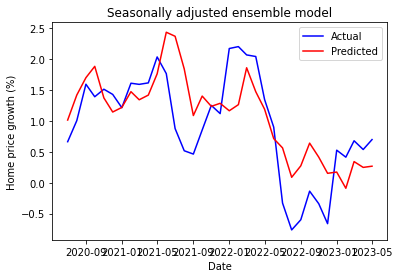

In [8]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted ensemble model')

In [9]:
features_nsa = [('sales_raw', 1),
            ('inventory_raw', 2),
            ('new_listings_raw', 5),
            ('mean_days_to_pending_raw', 1),
            ('mean_sale_to_list_ratio_raw', 2),
            ('median_days_to_pending_raw', 1),
            ('median_sale_to_list_ratio_raw', 2),
            ('newly_pending_listings_raw', 1),
            ('pct_listings_price_cut_raw', 2),
            ('pct_sold_above_list_price_raw', 2),
            ('pct_sold_below_list_price_raw', 2)]

In [10]:
(y, y_hat) = backtest(features_nsa, 100, 0.9, ds_begin, ds_end, False)

In [11]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

In [12]:
print(MSE, RMSE, MAE, MAPE, R2)

2.8590320757768493e-05 0.005346991748429063 0.004622183621743446 1.0117463033390772 0.7024512049878806


Text(0.5, 1.0, 'Non seasonally adjusted ensemble model')

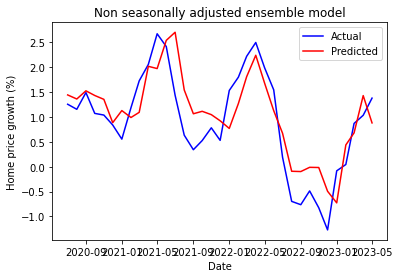

In [13]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted ensemble model')